# Data Gathering - Poll data

In [1]:
import gepd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
import seaborn as sns
import matplotlib.pyplot as plt

## Getting Data

In [2]:
data = gepd.gepd()

In [3]:
df = data.get_surveys()

In [4]:
data.get_parliaments()

{'0': {'Shortcut': 'Bundestag',
  'Name': 'Bundestag',
  'Election': 'Bundestagswahl'},
 '9': {'Shortcut': 'Niedersachsen',
  'Name': 'Niedersächsischer Landtag',
  'Election': 'Landtagswahl in Niedersachsen'},
 '8': {'Shortcut': 'Mecklenburg-Vorpommern',
  'Name': 'Landtag von Mecklenburg-Vorpommern',
  'Election': 'Landtagswahl in Mecklenburg-Vorpommern'},
 '3': {'Shortcut': 'Berlin',
  'Name': 'Berliner Abgeordnetenhaus',
  'Election': 'Abgeordnetenhauswahl in Berlin'},
 '13': {'Shortcut': 'Sachsen',
  'Name': 'Sächsischer Landtag',
  'Election': 'Landtagswahl in Sachsen'},
 '2': {'Shortcut': 'Bayern',
  'Name': 'Bayerischer Landtag',
  'Election': 'Landtagswahl in Bayern'},
 '16': {'Shortcut': 'Thüringen',
  'Name': 'Thüringischer Landtag',
  'Election': 'Landtagswahl in Thüringen'},
 '12': {'Shortcut': 'Saarland',
  'Name': 'Saarländischer Landtag',
  'Election': 'Landtagswahl im Saarland'},
 '11': {'Shortcut': 'Rheinland-Pfalz',
  'Name': 'Landtag von Rheinland-Pfalz',
  'Electio

In [5]:
df

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,2,1,4,3,7,0,5,8,101,102,11,13,10,14,9,6,16,15
0,2021-08-31,2340,0,24,97,2021-08-30,2021-08-31,27.0,19.5,15.5,13.0,10.5,8.0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-31,2001,0,17,13,2021-08-28,2021-08-29,25.0,21.0,19.0,11.0,11.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-31,2508,0,2,63,2021-08-24,2021-08-30,23.0,21.0,18.0,12.0,11.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-30,2015,0,5,4,2021-08-27,2021-08-30,25.0,20.0,16.5,13.5,11.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-28,1038,0,9,6,2021-08-18,2021-08-26,24.0,26.0,17.0,10.5,10.5,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,2017-01-25,2504,0,2,2,2017-01-16,2017-01-20,21.0,37.0,10.0,6.0,12.0,5.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1751,2017-01-24,5028,0,16,14,2017-01-12,2017-01-23,20.4,37.1,9.3,6.2,13.2,4.3,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,2017-01-24,1992,0,5,4,2017-01-20,2017-01-23,21.0,32.5,8.5,7.5,14.5,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1753,2017-01-22,2805,0,3,3,2017-01-12,2017-01-18,21.0,36.0,9.0,6.0,12.0,5.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Only federal election

In [6]:
df = df.loc[df["Parliament_ID"] == "0"]

## Transforming collum names

In [7]:
parties_dict = data.get_parties()

In [8]:
def parties_dict_short_function(parties_dict):
    dct = {}
    for key, value in parties_dict.items():
        dct[key] = value["Shortcut"]
    return dct

In [9]:
parties_dict_short  = parties_dict_short_function(parties_dict)


In [10]:
parties_dict_short

{'7': 'AfD',
 '11': 'BP',
 '14': 'BVB/FW',
 '4': 'Grüne',
 '16': 'BIW',
 '1': 'CDU/CSU',
 '101': 'CDU',
 '102': 'CSU',
 '5': 'Linke',
 '13': 'Die PARTEI',
 '3': 'FDP',
 '8': 'Freie Wähler',
 '9': 'NPD',
 '15': 'Tierschutzpartei',
 '6': 'Piraten',
 '2': 'SPD',
 '10': 'SSW',
 '0': 'Sonstige'}

In [11]:
df = df.rename(columns=parties_dict_short)

## Date to 120 days

In [12]:
df["Date"] =  pd.to_datetime(df["Date"], format= "Y-M-D")

In [30]:
start_date = "2021-05-22"
end_date = "2021-8-31"

In [31]:
df_dated = df.loc[(df['Date'] > start_date) & (df['Date'] <= end_date)]

## Eliminating useless collumns

In [32]:
df_dated = df_dated.fillna(0)

In [33]:
df_dated["CDU/CSU"] = df_dated["CDU/CSU"] + df_dated["CDU"] + df_dated["CSU"]

In [34]:
other_parties = ["Sonstige", "Freie Wähler", "BP","Die PARTEI", "SSW", "BVB/FW", "NPD", "Piraten",\
                    "BIW", "Tierschutzpartei"]

In [35]:
df_dated = df_dated.drop(columns = ["CDU", "CSU"])

In [36]:
df_dated["other"] =  df_dated[other_parties].sum(axis=1)

In [37]:
df_dated

,Date,Surveyed_Persons,Parliament_ID,Institute_ID,Tasker_ID,Date_Start,Date_End,SPD,CDU/CSU,Grüne,FDP,AfD,Sonstige,Linke,Freie Wähler,BP,Die PARTEI,SSW,BVB/FW,NPD,Piraten,BIW,Tierschutzpartei,other
0,2021-08-31,2340,0,24,97,2021-08-30,2021-08-31,27.0,19.5,15.5,13.0,10.5,8.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,2021-08-31,2001,0,17,13,2021-08-28,2021-08-29,25.0,21.0,19.0,11.0,11.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,2021-08-31,2508,0,2,63,2021-08-24,2021-08-30,23.0,21.0,18.0,12.0,11.0,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,2021-08-30,2015,0,5,4,2021-08-27,2021-08-30,25.0,20.0,16.5,13.5,11.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,2021-08-28,1038,0,9,6,2021-08-18,2021-08-26,24.0,26.0,17.0,10.5,10.5,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2021-05-27,1705,0,13,43,2021-05-21,2021-05-24,15.0,26.0,22.0,12.0,11.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
129,2021-05-26,10016,0,16,14,2021-05-19,2021-05-25,16.0,27.0,23.0,13.0,10.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
131,2021-05-26,2004,0,2,63,2021-05-18,2021-05-21,14.0,24.0,25.0,13.0,10.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
132,2021-05-26,2128,0,5,4,2021-05-21,2021-05-25,16.0,26.0,22.0,12.5,11.5,5.5,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5


In [38]:
df_dated = df_dated.drop( columns = other_parties ).drop( columns = ["Parliament_ID","Institute_ID", "Tasker_ID"] )


### Removing repeated dates with mean

In [39]:
df_dated_grouped = df_dated.groupby(by = "Date").mean()

In [40]:
pd.date_range(start = start_date, end = end_date ).difference(df_dated.Date).value_counts().sum()

35

In [41]:
## we have 37 missing values

### Adding missing dates

In [42]:
correct_dates = pd.DataFrame(pd.date_range(start = start_date, end = end_date ))

In [43]:
correct_dates

,0
0,2021-05-22
1,2021-05-23
2,2021-05-24
3,2021-05-25
4,2021-05-26
...,...
97,2021-08-27
98,2021-08-28
99,2021-08-29
100,2021-08-30


In [44]:
df_dated = correct_dates.merge(df_dated_grouped, how = "left", left_on= 0 , right_on = ["Date" ])

In [45]:
df_dated = df_dated.set_index([0])

In [46]:
df_dated

,Surveyed_Persons,SPD,CDU/CSU,Grüne,FDP,AfD,Linke,other
0,,,,,,,,
2021-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-23,1405.0,17.000000,24.000000,23.000000,13.000000,12.000000,6.000000,5.000000
2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-26,4716.0,15.333333,25.666667,23.333333,12.833333,10.500000,6.166667,6.166667
...,...,...,...,...,...,...,...,...
2021-08-27,1494.5,23.000000,22.000000,18.000000,11.500000,11.000000,7.000000,8.000000
2021-08-28,1142.5,24.000000,23.500000,17.000000,11.750000,10.750000,6.000000,7.000000
2021-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#df_dated = df_dated.where(df_dated.notnull() , other = df_dated.fillna(method='bfill'))


In [48]:
df_dated = df_dated.fillna(method='ffill')

In [49]:
df_dated

,Surveyed_Persons,SPD,CDU/CSU,Grüne,FDP,AfD,Linke,other
0,,,,,,,,
2021-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-23,1405.0,17.000000,24.000000,23.000000,13.000000,12.000000,6.000000,5.000000
2021-05-24,1405.0,17.000000,24.000000,23.000000,13.000000,12.000000,6.000000,5.000000
2021-05-25,1405.0,17.000000,24.000000,23.000000,13.000000,12.000000,6.000000,5.000000
2021-05-26,4716.0,15.333333,25.666667,23.333333,12.833333,10.500000,6.166667,6.166667
...,...,...,...,...,...,...,...,...
2021-08-27,1494.5,23.000000,22.000000,18.000000,11.500000,11.000000,7.000000,8.000000
2021-08-28,1142.5,24.000000,23.500000,17.000000,11.750000,10.750000,6.000000,7.000000
2021-08-29,1142.5,24.000000,23.500000,17.000000,11.750000,10.750000,6.000000,7.000000


In [50]:
df_dated.isna().value_counts()

Surveyed_Persons  SPD    CDU/CSU  Grüne  FDP    AfD    Linke  other
False             False  False    False  False  False  False  False    101
True              True   True     True   True   True   True   True       1
dtype: int64

### Removing first two and last two values

In [51]:
df_final =  df_dated.iloc[2:].round(2)


In [52]:
df_final

,Surveyed_Persons,SPD,CDU/CSU,Grüne,FDP,AfD,Linke,other
0,,,,,,,,
2021-05-24,1405.00,17.00,24.00,23.00,13.00,12.00,6.00,5.00
2021-05-25,1405.00,17.00,24.00,23.00,13.00,12.00,6.00,5.00
2021-05-26,4716.00,15.33,25.67,23.33,12.83,10.50,6.17,6.17
2021-05-27,1705.00,15.00,26.00,22.00,12.00,11.00,7.00,7.00
2021-05-28,1718.00,14.00,25.00,23.00,11.50,12.50,8.00,6.00
2021-05-29,1301.00,16.00,25.00,22.00,13.00,12.00,7.00,5.00
2021-05-30,1301.00,16.00,25.00,22.00,13.00,12.00,7.00,5.00
2021-05-31,1301.00,16.00,25.00,22.00,13.00,12.00,7.00,5.00
2021-06-01,2040.00,15.50,25.50,21.50,13.50,11.00,6.50,6.50


In [53]:
df_final.index.name = 'Date'

In [54]:
df_final["Surveyed_Persons"] = df_final["Surveyed_Persons"].astype(int)

In [55]:
df_final =df_final.round(2)

In [56]:
df_final.reset_index()

,Date,Surveyed_Persons,SPD,CDU/CSU,Grüne,FDP,AfD,Linke,other
0,2021-05-24,1405,17.00,24.00,23.00,13.00,12.00,6.00,5.00
1,2021-05-25,1405,17.00,24.00,23.00,13.00,12.00,6.00,5.00
2,2021-05-26,4716,15.33,25.67,23.33,12.83,10.50,6.17,6.17
3,2021-05-27,1705,15.00,26.00,22.00,12.00,11.00,7.00,7.00
4,2021-05-28,1718,14.00,25.00,23.00,11.50,12.50,8.00,6.00
5,2021-05-29,1301,16.00,25.00,22.00,13.00,12.00,7.00,5.00
6,2021-05-30,1301,16.00,25.00,22.00,13.00,12.00,7.00,5.00
7,2021-05-31,1301,16.00,25.00,22.00,13.00,12.00,7.00,5.00
8,2021-06-01,2040,15.50,25.50,21.50,13.50,11.00,6.50,6.50
9,2021-06-02,6257,15.00,27.00,23.00,13.00,9.50,6.00,6.50


In [62]:
df_final1 = df_final.drop(columns = "Surveyed_Persons")

In [63]:
df_final1.to_csv("polls_data_2021_v7.csv")

### Plotting

In [58]:
parties = ["CDU/CSU", "SPD", "Grüne", "FDP", "AfD","Linke", "other" ]

<AxesSubplot:xlabel='Date'>

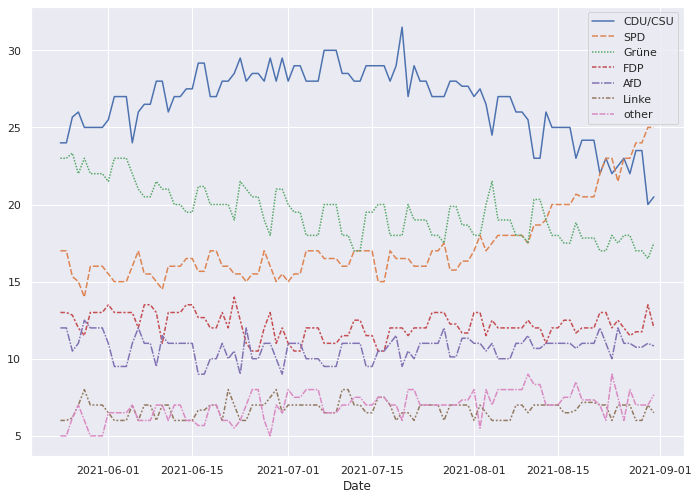

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_final[parties])


In [197]:
end_date

'2021-08-31'

In [196]:
start_date

'2021-08-30'

In [185]:
import datetime

In [194]:
current_time = datetime.datetime.today()
    # get current time yesterday
current_time_yesterday = (current_time - datetime.timedelta(1))
    # convert to ISO 8601: YYYY-MM-DDTHH:mm:ssZ
    # this is UTC; we are not accounting for german time zone +02:00
start_date = f"{str(current_time_yesterday)[:10]}"
end_date = f"{str(current_time)[:10]}"

In [195]:
start_date

'2021-08-30'